In [ ]:
import numpy as np
import math


class SimpleMDPEnv:
    def __init__(self):
        # Define the state space and action space
        self.state_space = [0, 1, 2, 3, 4, 5]  #  states
        self.action_space = [0, 1]  # actions
        self.initial_state = self.state_space[0]
        self.state = self.state_space[0] 
        self.transitions = [
            (0, 0, 2),
            (2, 0, 3),
            (2, 1, 2),
            (3, 0, 4),
            (3, 1, 3),
            (0, 1, 1),
            (1, 1, 5),
            (1, 0, 1),
            (5, 0, 5),
            (5, 1, 5)            
        ]
        self.atomic_propositions = {0: "a", 1: "a", 2: "a", 3: "a", 4: "b", 5: "c"}  

    def reset(self):
        return self.initial_state

    def transition_function(self, current_state, action):
        
        for (cur_state, act, next_state) in self.transitions:
            if cur_state == current_state and act == action:
                return next_state
        raise ValueError(f"Invalid transition for state {current_state} and action {action}.")


    def step(self, action, target):
        
        if action not in self.action_space:
            raise ValueError(f"Invalid action: {action}. Valid actions: {self.action_space}")

        # Transition
        next_state = self.transition_function(self.state, action)

        

        # terminal condition
        done = self.atomic_propositions[next_state] == target

        self.state = next_state
        return next_state , done


    def render(self):
        
        print(f"Current State: {self.state}, Atomic Proposition: {self.atomic_propositions[self.state]}")




    def distance_to_target(self, start_state, target_ap):
        
        visited = set()
        queue = [(start_state, 0)]  # (current_state, distance)

        while queue:
            current_state, distance = queue.pop(0)

            if self.atomic_propositions[current_state] == target_ap:
                return distance

            visited.add(current_state)

            for (cur_state, act, next_state) in self.transitions:
                if cur_state == current_state and next_state not in visited:
                    queue.append((next_state, distance + 1))

        return math.inf



def reward(tr, tr1, env, env1, step):
    def calculate_phi(tr_a, tr_b, env_a, env_b, target_a, target_b):
        temp_values = []

        for i in range(max(len(tr_a), len(tr_b))):
            if i >= len(tr_b):  # When tr_b is exhausted
                temp_values.append(1 - env_a.distance_to_target(tr_a[i], target_a))
                continue

            if i >= len(tr_a):  
                temp_values.append(1 - env_b.distance_to_target(tr_b[i], target_b))
                continue

            
            temp = min(
                1 - env_a.distance_to_target(tr_a[i], target_a),
                1 - env_b.distance_to_target(tr_b[i], target_b)
            )
            temp_values.append(temp)

        print(temp_values)
        return max(temp_values)

    
    phi1 = calculate_phi(tr, tr1, env, env1, "b", "c")
    phi2 = calculate_phi(tr, tr1, env, env1, "c", "b")

    
    return max(phi1, phi2)




if __name__ == "__main__":


    env = SimpleMDPEnv()
    env1 = SimpleMDPEnv()

    trajectory  = list()

    trajectory1 = list()

    
    
    state = env.reset()
    state1 = env1.reset()


    trajectory.append(state)
    trajectory1.append(state1)

    print(f"Agent 0: Initial State: {state}, AP: {env.atomic_propositions[state]}")
    print(f"Agent 1: Initial State: {state1}, AP: {env1.atomic_propositions[state1]}")


    done = False
    done1 = False 


    total_reward = 0
    total_reward1 = 0

    

    step = 0

    while (done == False or done1 == False):
        # action = np.random.choice(env.action_space)
        # action1 = np.random.choice(env1.action_space)

        action = 0
        action1 = 1

        if done == False:
            
            next_state, done = env.step(action,"b")
            trajectory.append(next_state)

            # print("agent 0")
            # env.render()

        if done1 == False:
            next_state1, done1 = env1.step(action1,"c")

            trajectory1.append(next_state1)
            # print("agent 1")
            # env1.render()

        
        print(reward(trajectory, trajectory1, env, env1, step))
            

        step += 1

    print(trajectory)
    print(trajectory1)

    # print(f"Reward agent 0: {total_reward}")
    # print(f"Reward agent 1: {total_reward1}")


Agent 0: Initial State: 0, AP: a
Agent 1: Initial State: 0, AP: a
[-2, -1]
[-2, -inf]
-1
[-2, -1, 0]
[-2, -inf, -inf]
0
[-2, -1, 0, 1]
[-2, -inf, -inf, -inf]
1
[0, 2, 3, 4]
[0, 1, 5]


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random
import math


class SimpleMDPEnv:
    def __init__(self):
        # Define the state space and action space
        self.state_space = [0, 1, 2, 3, 4, 5]  #  states
        self.action_space = [0, 1]  # actions
        self.initial_state = self.state_space[0]
        self.state = self.state_space[0] 
        self.transitions = [
            (0, 0, 2),
            (2, 0, 3),
            (2, 1, 2),
            (3, 0, 4),
            (3, 1, 3),
            (0, 1, 1),
            (1, 1, 5),
            (1, 0, 1),
            (5, 0, 5),
            (5, 1, 5)            
        ]
        self.atomic_propositions = {0: "a", 1: "a", 2: "a", 3: "a", 4: "b", 5: "c"}  

    def reset(self):
        return self.initial_state

    def transition_function(self, current_state, action):
        
        for (cur_state, act, next_state) in self.transitions:
            if cur_state == current_state and act == action:
                return next_state
        raise ValueError(f"Invalid transition for state {current_state} and action {action}.")


    def step(self, action, target):
        
        if action not in self.action_space:
            raise ValueError(f"Invalid action: {action}. Valid actions: {self.action_space}")

        # Transition
        next_state = self.transition_function(self.state, action)

        

        # terminal condition
        done = self.atomic_propositions[next_state] == target

        self.state = next_state
        return next_state , done


    def render(self):
        
        print(f"Current State: {self.state}, Atomic Proposition: {self.atomic_propositions[self.state]}")




    def distance_to_target(self, start_state, target_ap):
        
        visited = set()
        queue = [(start_state, 0)]  # (current_state, distance)

        while queue:
            current_state, distance = queue.pop(0)

            if self.atomic_propositions[current_state] == target_ap:
                return distance

            visited.add(current_state)

            for (cur_state, act, next_state) in self.transitions:
                if cur_state == current_state and next_state not in visited:
                    queue.append((next_state, distance + 1))

        return math.inf



def reward(tr, tr1, env, env1, step):
    def calculate_phi(tr_a, tr_b, env_a, env_b, target_a, target_b):
        temp_values = []

        for i in range(max(len(tr_a), len(tr_b))):
            if i >= len(tr_b):  # When tr_b is exhausted
                temp_values.append(1 - env_a.distance_to_target(tr_a[i], target_a))
                continue

            if i >= len(tr_a):  
                temp_values.append(1 - env_b.distance_to_target(tr_b[i], target_b))
                continue

            
            temp = min(
                1 - env_a.distance_to_target(tr_a[i], target_a),
                1 - env_b.distance_to_target(tr_b[i], target_b)
            )
            temp_values.append(temp)

        print(temp_values)
        return max(temp_values)

    
    phi1 = calculate_phi(tr, tr1, env, env1, "b", "c")
    phi2 = calculate_phi(tr, tr1, env, env1, "c", "b")

    
    return max(phi1, phi2)




class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state, verbose=0)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



class MultiAgentDQN:
    def __init__(self, state_size, action_size):
        self.state_size = state_size * 2  # Combined state size for two agents
        self.action_size = action_size * 2  # Combined action size for two agents
        self.memory = []
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return [random.randrange(2), random.randrange(2)]  # Two random actions
        act_values = self.model.predict(state, verbose=0)
        return [np.argmax(act_values[0][:2]), np.argmax(act_values[0][2:])]  # Actions for both agents

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action[0]] = target
            target_f[0][action[1] + 2] = target  # Offset for second agent actions
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay



if __name__ == "__main__":
    env1 = SimpleMDPEnv()
    env2 = SimpleMDPEnv()

    state_size = 1  # Single integer representing the state
    action_size = len(env1.action_space)

    agent = MultiAgentDQN(state_size, action_size)

    episodes = 1000
    batch_size = 32

    target_proposition1 = input("Enter the target atomic proposition for Environment 1 (e.g., 'e'): ")
    target_proposition2 = input("Enter the target atomic proposition for Environment 2 (e.g., 'e'): ")

    for e in range(episodes):
        state1 = env1.reset()
        state2 = env2.reset()

        combined_state = np.reshape([state1, state2], [1, state_size * 2])

        total_reward1 = 0
        total_reward2 = 0

        for time in range(500):
            # Multi-agent action
            actions = agent.act(combined_state)
            action1, action2 = actions[0], actions[1]

            # Agent 1 environment step
            next_state1, reward1, done1 = env1.step(action1, target_proposition1)
            total_reward1 += reward1

            # Agent 2 environment step
            next_state2, reward2, done2 = env2.step(action2, target_proposition2)
            total_reward2 += reward2

            combined_next_state = np.reshape([next_state1, next_state2], [1, state_size * 2])

            agent.remember(combined_state, actions, reward1 + reward2, combined_next_state, done1 and done2)
            combined_state = combined_next_state

            if done1 and done2:
                print(f"Episode {e+1}/{episodes} - Reward1: {total_reward1}, Reward2: {total_reward2}, Epsilon: {agent.epsilon:.2f}")
                break

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)


ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import random

class SimpleMDPEnv:
    def __init__(self):
        # Define the state space and action space
        self.state_space = [0, 1, 2, 3, 4, 5]  #  states
        self.action_space = [0, 1]  # actions
        self.initial_state = self.state_space[0]
        self.state = self.state_space[0] 
        self.transitions = [
            (0, 0, 2),
            (2, 0, 3),
            (2, 1, 2),
            (3, 0, 4),
            (3, 1, 3),
            (0, 1, 1),
            (1, 1, 5),
            (1, 0, 1),
            (5, 0, 5),
            (5, 1, 5)            
        ]
        self.atomic_propositions = {0: "a", 1: "a", 2: "a", 3: "a", 4: "b", 5: "c"}  

    def reset(self):
        return self.initial_state

    def transition_function(self, current_state, action):
        
        for (cur_state, act, next_state) in self.transitions:
            if cur_state == current_state and act == action:
                return next_state
        raise ValueError(f"Invalid transition for state {current_state} and action {action}.")


    def step(self, action, target):
        
        if action not in self.action_space:
            raise ValueError(f"Invalid action: {action}. Valid actions: {self.action_space}")

        # Transition
        next_state = self.transition_function(self.state, action)

        

        # terminal condition
        done = self.atomic_propositions[next_state] == target

        self.state = next_state
        return next_state , done


    def render(self):
        
        print(f"Current State: {self.state}, Atomic Proposition: {self.atomic_propositions[self.state]}")




    def distance_to_target(self, start_state, target_ap):
        
        visited = set()
        queue = [(start_state, 0)]  # (current_state, distance)

        while queue:
            current_state, distance = queue.pop(0)

            if self.atomic_propositions[current_state] == target_ap:
                return distance

            visited.add(current_state)

            for (cur_state, act, next_state) in self.transitions:
                if cur_state == current_state and next_state not in visited:
                    queue.append((next_state, distance + 1))

        return math.inf



def reward(tr, tr1, env, env1, step):
    def calculate_phi(tr_a, tr_b, env_a, env_b, target_a, target_b):
        temp_values = []

        for i in range(max(len(tr_a), len(tr_b))):
            if i >= len(tr_b):  # When tr_b is exhausted
                temp_values.append(1 - env_a.distance_to_target(tr_a[i], target_a))
                continue

            if i >= len(tr_a):  
                temp_values.append(1 - env_b.distance_to_target(tr_b[i], target_b))
                continue

            
            temp = min(
                1 - env_a.distance_to_target(tr_a[i], target_a),
                1 - env_b.distance_to_target(tr_b[i], target_b)
            )
            temp_values.append(temp)

        print(temp_values)
        return max(temp_values)

    
    phi1 = calculate_phi(tr, tr1, env, env1, "b", "c")
    phi2 = calculate_phi(tr, tr1, env, env1, "c", "b")

    
    return max(phi1, phi2)


# DQN Agent
class MultiAgentDQN:
    def __init__(self, state_size, action_size):
        self.state_size = state_size * 2  # Combined state size for two agents
        self.action_size = action_size * 2  # Combined action size for two agents
        self.memory = []
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return [random.randrange(2), random.randrange(2)]  # Two random actions
        act_values = self.model.predict(state, verbose=0)
        return [np.argmax(act_values[0][:2]), np.argmax(act_values[0][2:])]  # Actions for both agents

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state, verbose=0)[0])
            target_f = self.model.predict(state, verbose=0)
            target_f[0][action[0]] = target
            target_f[0][action[1] + 2] = target  # Offset for second agent actions
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

if __name__ == "__main__":
    

    env1 = SimpleMDPEnv()
    env2 = SimpleMDPEnv()

    

    state_size = 1  
    action_size = len(env1.action_space)

    agent = MultiAgentDQN(state_size, action_size)

    episodes = 100
    batch_size = 32


    for e in range(episodes):
        state1 = env1.reset()
        state2 = env2.reset()

        trajectory1  = list()

        trajectory2 = list()

        combined_state = np.reshape([state1, state2], [1, state_size * 2])

        total_reward = 0

        done1 = False
        done2 = False

        for time in range(500):
            
            actions = agent.act(combined_state)

            action1, action2 = actions[0], actions[1]


            if done == False:
            
                next_state1, done1 = env1.step(action,"b")
                trajectory1.append(next_state1)

            
            if done1 == False:

                next_state2, done2 = env2.step(action1,"c")
                trajectory2.append(next_state2)


            total_reward += reward(trajectory, trajectory1, env, env1, step)

            
            

            combined_next_state = np.reshape([next_state1, next_state2], [1, state_size * 2])

            agent.remember(combined_state, actions, total_reward, combined_next_state, done1 and done2)
            combined_state = combined_next_state

            if done1 and done2:
                print(f"Episode {e+1}/{episodes} - Reward{total_reward}, Epsilon: {agent.epsilon:.2f}")
                break

        if len(agent.memory) > batch_size:
            agent.replay(batch_size)




KeyboardInterrupt: 

In [1]:
import numpy as np
import time 


class PCPMDPEnv:
    def __init__(self):
        # Define the dominos context (action -> top and bottom strings)
        self.dominos_context = {
            1: ("ab", "a"),
            2: ("aba", "ba"),
            3: ("c", "ba"),
            4: ("bb", "cb"),
            5: ("c", "bc")
        }  # Domino format: action -> (top string, bottom string)

        self.action_space = [1, 2, 3, 4, 5]   # Actions correspond to the dominos
        self.state_space = [1, 2, 3, 4, 5]  # States represent the labels of dominos picked
        self.state = None  # Current state represented as the sequence of picked dominos (labels)
        self.domino_strings = ("", "")  # Current top and bottom strings

    def reset(self):
        """Resets the environment to the initial state."""
        self.state = []  # Start with no dominos picked (empty state sequence)
        self.domino_strings = ("", "")  # Empty top and bottom strings
        return self.state

    def transition_function(self, current_state, action):
        """Encodes the transition logic by appending the chosen domino to the current state.

        Args:
            current_state (list): The current state (sequence of picked dominos).
            action (int): The action to take (pick a domino).

        Returns:
            next_state (list): The next state after taking the action.
        """
        next_state = current_state + [action]  # Append the domino label to the state sequence
        return next_state

    def update_domino_strings(self, action):
        """Updates the top and bottom strings based on the chosen domino.

        Args:
            action (int): The action to take (pick a domino).
        """
        top_string, bottom_string = self.domino_strings
        domino_top, domino_bottom = self.dominos_context[action]
        self.domino_strings = (top_string + domino_top, bottom_string + domino_bottom)

    def step(self, action):
        """Takes an action and returns the next state, reward, and done flag.

        Args:
            action (int): The action to take (must be in the action space).

        Returns:
            next_state (list): The next state after taking the action.
            reward (float): The reward for taking the action.
            done (bool): Whether the episode is finished.
        """
        if action not in self.action_space:
            raise ValueError(f"Invalid action: {action}. Valid actions: {self.action_space}")

        # Update the state with the domino label
        next_state = self.transition_function(self.state, action)

        # Update the domino strings (top and bottom)
        self.update_domino_strings(action)

        # Check if the top and bottom strings are equal
        done = self.domino_strings[0] == self.domino_strings[1]

        # Reward logic

        next_domino = self.domino_strings
        

        self.state = next_state


        return next_state, next_domino

    def render(self):
        """Renders the current state."""
        print(f"Current State (Domino Labels): {self.state}")
        # print(f"Domino Strings: Top: {self.domino_strings[0]}, Bottom: {self.domino_strings[1]}")


def rew(trajectory, trajectory1, domino, domino1, step):

    ##############Semimatch############## 

    ### phi1

    phi_1_list = list()

    domino_1_top = domino[0] + "#"

    domino_1_bottom = domino[1] + "#"


    for index in range(min(len(domino_1_top), len(domino_1_bottom))-1):

        if domino_1_top[index] ==  domino_1_bottom[index]:
            phi_1_list.append(1) ## 1 - dist (a,a) = 1
        else:
            phi_1_list.append(0)  ## 1 - dist (a,b) = 0

    phi_1 = min(phi_1_list)

    #######phi_2

    index = min(len(domino_1_top), len(domino_1_bottom)) - 1

    phi_2_list = [min(-1*int(domino_1_top[index]== "#"), int(domino_1_bottom[index]== "#")), min(int(domino_1_top[index]== "#"), -1 * int(domino_1_bottom[index]== "#"))]

    phi_2 = max(phi_2_list)

    semimatch = max(phi_1,phi_2)

    #################Match##################

    domino_2_top = domino1[0] + "#"

    domino_2_bottom = domino1[1] + "#"

    max_length = max(len(domino_2_top), len(domino_2_bottom))

    # Padding 

    # print(domino_2_top, domino_2_bottom)

    domino_2_top = domino_2_top.ljust(max_length, '#')
    domino_2_bottom = domino_2_bottom.ljust(max_length, '#')

    # print(domino_2_top,domino_2_bottom)

    match_list = list()

    for index in range(min(len(domino_2_top), len(domino_2_bottom))-1):

        if domino_2_top[index] ==  domino_2_bottom[index]:
            match_list.append(1) ## 1 - dist (a,a) = 1
        else:
            match_list.append(0)  ## 1 - dist (a,b) = 0

    match = min(match_list)

    ##################Extend##################

    # print(trajectory,trajectory1)
    extend_list= list()

    for index in range(min(len(trajectory), len(trajectory1))):

        if trajectory[index] ==  trajectory1[index]:
            extend_list.append(1) ## 1 - dist (a,a) = 1
        else:
            extend_list.append(0)  ## 1 - dist (a,b) = 0
    
    extend = min(extend_list)

   

    reward = max (-1*semimatch , min(extend, match))

    return reward




def reward(trajectory, trajectory1, domino, domino1, step):

    ##############Semimatch############## 

    ### phi1

    phi_1_list = list()

    domino_1_top = domino[0] + "#"

    domino_1_bottom = domino[1] + "#"

    phi_1 = 1


    for index in range(min(len(domino_1_top), len(domino_1_bottom))-1):

        if domino_1_top[index] ==  domino_1_bottom[index]:
            continue
        else:
            phi_1 = phi_1 - 1 

    # phi_1 = min(phi_1_list)

    #######phi_2

    index = min(len(domino_1_top), len(domino_1_bottom)) - 1

    phi_2_list = [min(-1*int(domino_1_top[index]== "#"), int(domino_1_bottom[index]== "#")), min(int(domino_1_top[index]== "#"), -1 * int(domino_1_bottom[index]== "#"))]

    phi_2 = max(phi_2_list)

    # semimatch = max(phi_1,phi_2)

    semimatch = phi_1

    #################Match##################

    domino_2_top = domino1[0] + "#"

    domino_2_bottom = domino1[1] + "#"

    max_length = max(len(domino_2_top), len(domino_2_bottom))

    # Padding 

    # print(domino_2_top, domino_2_bottom)

    domino_2_top = domino_2_top.ljust(max_length, '#')
    domino_2_bottom = domino_2_bottom.ljust(max_length, '#')

    # print(domino_2_top,domino_2_bottom)

    match_list = list()

    match = 1

    for index in range(min(len(domino_2_top), len(domino_2_bottom))-1):

        if domino_2_top[index] ==  domino_2_bottom[index]:
            continue
        else:
            match = match -1 

    # match = min(match_list)

    ##################Extend##################

    # print(trajectory,trajectory1)
    extend_list= list()

    extend = 1

    for index in range(min(len(trajectory), len(trajectory1))):

        if trajectory[index] ==  trajectory1[index]:
            continue
        else:
            extend = extend -1 
    
    # extend = min(extend_list)

   

    reward = max (semimatch , min(extend, match))

    # print(semimatch, match, extend)

    return reward

    

if __name__ == "__main__":


    env = PCPMDPEnv()
    env1 = PCPMDPEnv()


    
    
    state = env.reset()
    state1 = env1.reset()



    done = False
    done1 = False 


    total_reward = 0
    total_reward1 = 0

    

    step = 0

    act = [1,2,3,4,5]

    while (done == False or done1 == False):
        # action = np.random.choice(env.action_space)
        # action1 = np.random.choice(env1.action_space)

        action = 1
        action1 = act[step]

        if done == False:
            
            trajectory, domino = env.step(action)


            # print("agent 0")
            # env.render()

        if done1 == False:
            trajectory1, domino1 = env1.step(action1)
            

        
        reward(trajectory, trajectory1, domino, domino1, step)

        print(reward)


        time.sleep(1)
            

        step += 1


    # print(f"Reward agent 0: {total_reward}")
    # print(f"Reward agent 1: {total_reward1}")


1 0 1
<function reward at 0x111ec22a0>
0 -1 0
<function reward at 0x111ec22a0>
0 0 -1
<function reward at 0x111ec22a0>
-1 0 -2
<function reward at 0x111ec22a0>
-1 1 -3
<function reward at 0x111ec22a0>


IndexError: list index out of range

In [8]:
def reward_pcp_new(state):

    def domino_cont(state):
        dominos_context = {
                1: ("ab", "a"),
                2: ("aba", "ba"),
                3: ("c", "ba"),
                4: ("bb", "cb"),
                5: ("c", "bc")
            } 
        final_domino = ("", "")
        for key in state:
            start, end = dominos_context[key]
            final_domino = (final_domino[0] + start, final_domino[1] + end)
        return final_domino
    
    def count_diff(str1, str2):

        if len(str1) != len(str2):
            raise ValueError("Strings must be of the same length.")
        
        differences = sum(1 for a, b in zip(str1, str2) if a != b)
        return differences

    match_list = list()
    semimatch_list = list()


    for t in range( len(state)):
        temp = state[:t+1].copy()
        domino = domino_cont(temp)

        domino_top = domino[0] + "#"

        domino_bottom = domino[1] + "#"

        ###############Match################################

        max_length = max(len(domino_top), len(domino_bottom))

        domino_top = domino_top.ljust(max_length, '#')
        domino_bottom = domino_bottom.ljust(max_length, '#')

        # print(domino_bottom, domino_top)

        diff = count_diff(domino_bottom, domino_top)

        match_list.append(1-diff)

        ###############SemiMatch################################

        domino_top = domino[0] + "#"

        domino_bottom = domino[1] + "#"

        diff = 0

        for index in range(min(len(domino_top), len(domino_bottom))-1):

            if domino_top[index] ==  domino_bottom[index]:
                continue
            else:
                diff = diff + 1
        
        semimatch_list.append(1-diff)

    ###############Formula################################

    semimatch = min(semimatch_list)

    matched = min(match_list)


    if semimatch == 1:
        semimatch = 5
    if match_list[-1] == 1:
        matched = 10

    # print(semimatch_list)
    # print(match_list)

    reward = max(semimatch, matched)

    return reward


reward_pcp_new([1,2,3,4,5])


10

In [37]:
df1 = pd.read_csv("data/test.csv")
df2= pd.read_csv("data/fair_2_5.csv")

df = (df1 + df2) / 2
df

,Agent 0,Agent 1
0,27.5,29.0
1,67.5,55.5
2,52.5,56.0
3,251.0,228.5
4,408.0,405.0
...,...,...
195,472.0,477.0
196,475.5,475.0
197,474.5,474.0
198,474.5,474.5


In [43]:
df1 = pd.read_csv("data/test.csv")
df2= pd.read_csv("data/fair_2_5.csv")

df = (df1 + df2) / 2

df['avg'] = (df['Agent 0'] + df['Agent 1']) / 2


# Assuming your DataFrame is named df

# Add a new column with values starting at 500 and increasing by 500 for each row
df['steps'] = (df.index + 1) * 500

df.to_csv("test.csv", index=False)


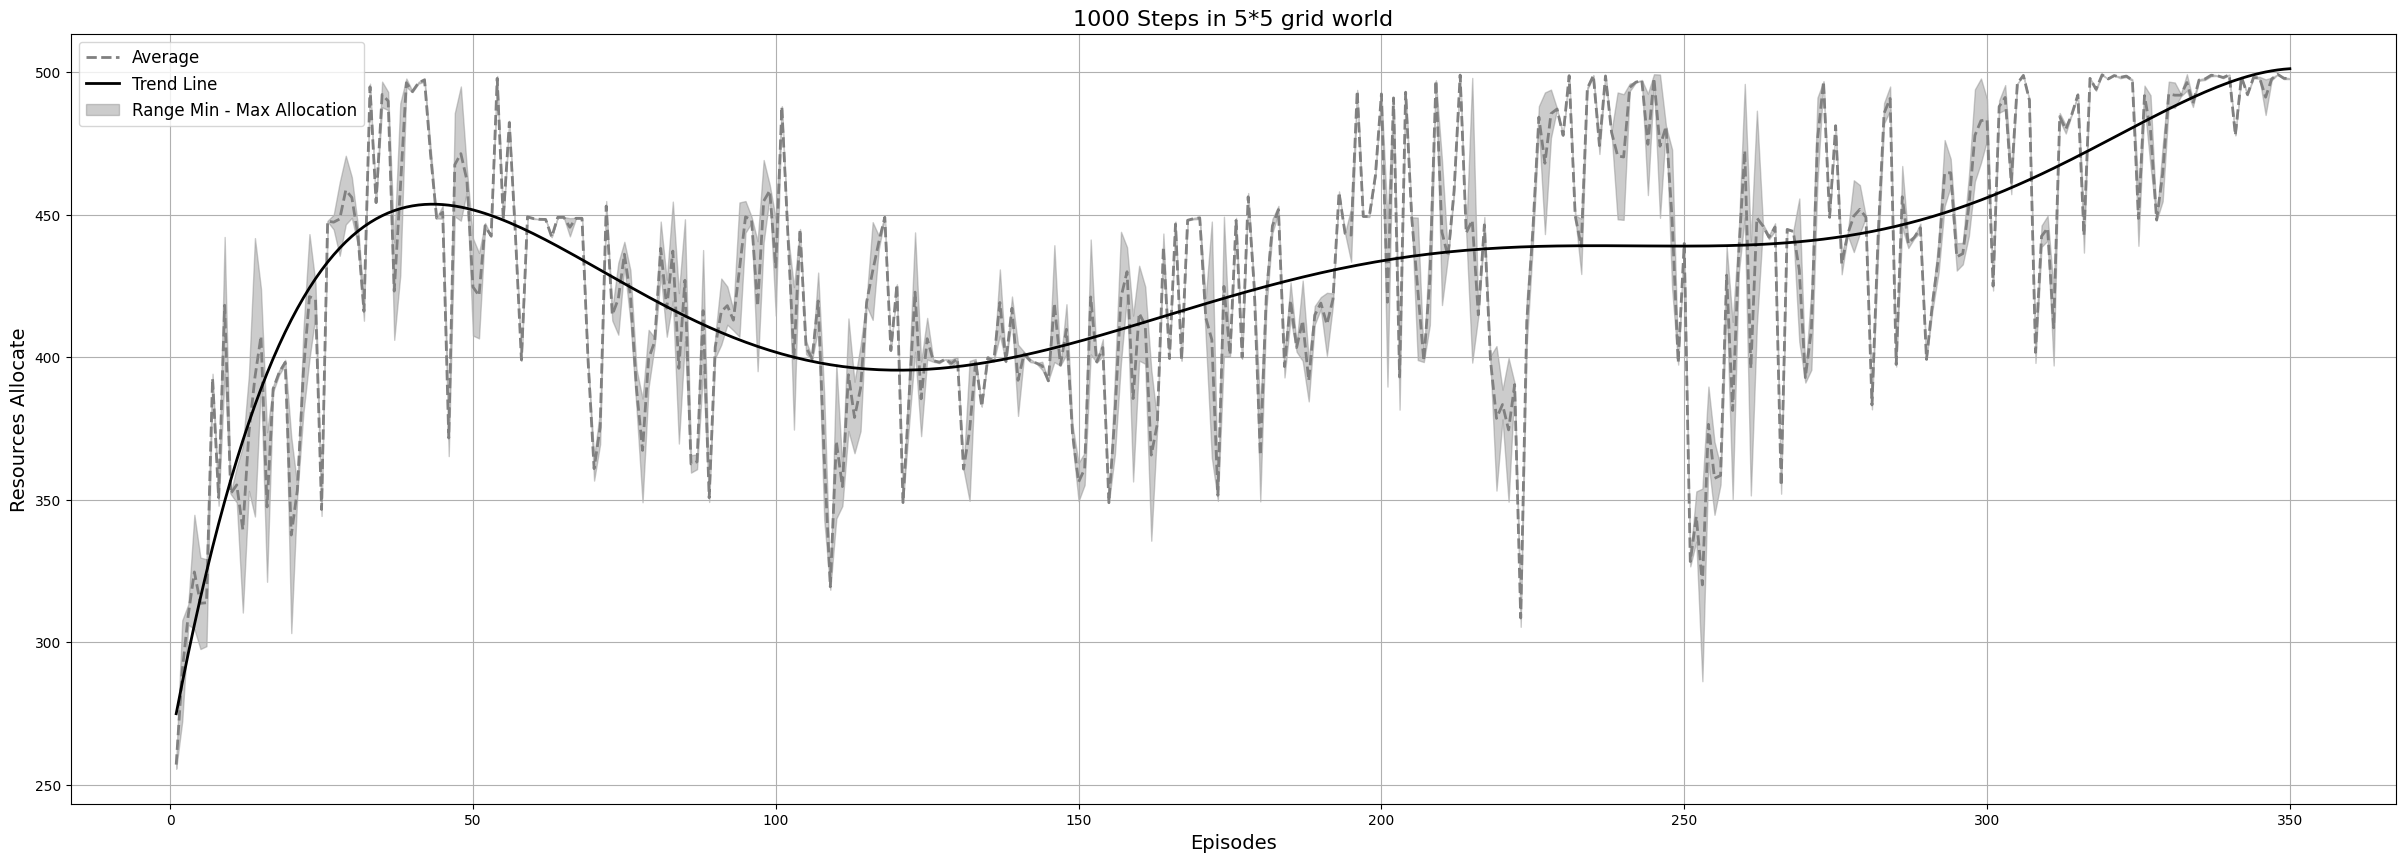

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt


df1 = pd.read_csv("data/grid5/fair_2_5_0.csv")
df2= pd.read_csv("data/grid5/fair_2_5_1.csv")
df3= pd.read_csv("data/grid5/fair_2_5_2.csv")
df4= pd.read_csv("data/grid5/fair_2_5_3.csv")
df5= pd.read_csv("data/grid5/fair_2_5_4.csv")
df6= pd.read_csv("data/grid5/fair_2_5_5.csv")
df7= pd.read_csv("data/grid5/fair_2_5_6.csv")
df8= pd.read_csv("data/grid5/fair_2_5_7.csv")
df9= pd.read_csv("data/grid5/fair_2_5_8.csv")
df10= pd.read_csv("data/grid5/fair_2_5_9.csv")

df = (df1 + df2 + df3 + df4 + df5 + df6 + df7 + df8 + df9+ df10) / 10

df['avg'] = (df['Agent 0'] + df['Agent 1']) / 2

df['min'] = df[['Agent 0', 'Agent 1']].min(axis=1)
df['max'] = df[['Agent 0', 'Agent 1']].max(axis=1)

# Add incremental steps for the x-axis
df['steps'] = (df.index + 1) * 1

x = df['steps']
y = df['avg']

# Use a polynomial of degree 2 (adjust degree as needed for a better fit)
poly = Polynomial.fit(x, y, deg=6)

# Get the trend line values
trend_line = poly(x)

# Plot the original average data
plt.figure(figsize=(30, 10))
plt.plot(df['steps'], df['avg'], label='Average', color='gray', linewidth=2, linestyle='--')

# Overlay the trend line
plt.plot(df['steps'], trend_line, label='Trend Line', color='black', linewidth=2)

# Fill between min and max for the range
plt.fill_between(df['steps'], df['max'], df['min'], color='gray', alpha=0.4, label='Range Min - Max Allocation')

# Add labels, legend, and grid
plt.xlabel('Episodes', fontsize=14)
plt.ylabel('Resources Allocate', fontsize=14)
plt.title('1000 Steps in 5*5 grid world', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


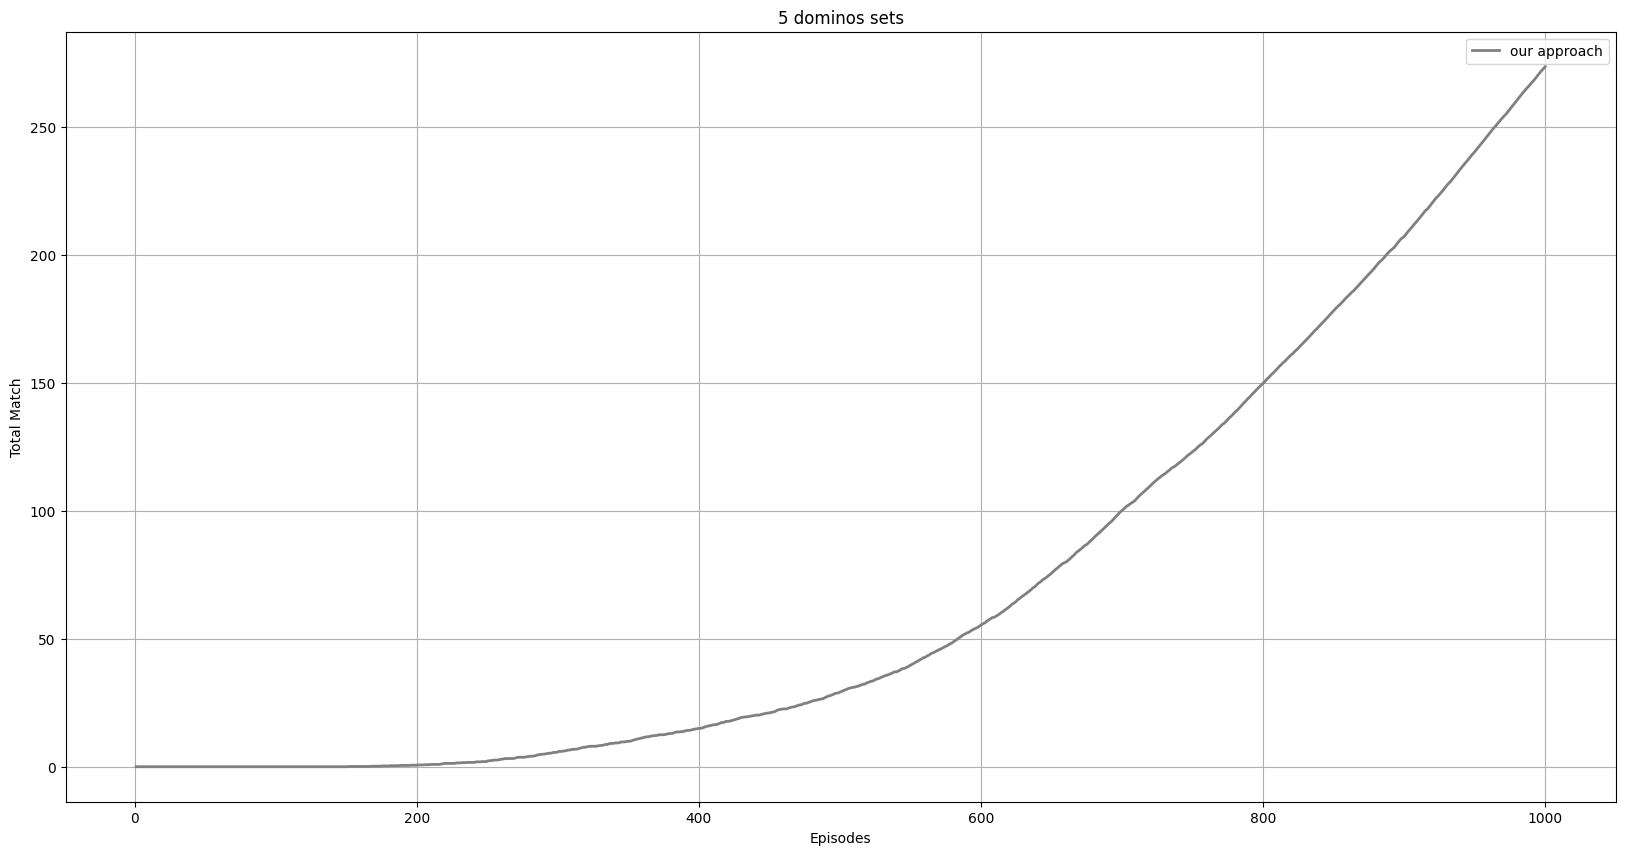

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_csv("data/domdqn_5/data_0.csv")
df2= pd.read_csv("data/domdqn_5/data_1.csv")
df3= pd.read_csv("data/domdqn_5/data_2.csv")
df4= pd.read_csv("data/domdqn_5/data_3.csv")
df5= pd.read_csv("data/domdqn_5/data_4.csv")
df6= pd.read_csv("data/domdqn_5/data_5.csv")
df7= pd.read_csv("data/domdqn_5/data_6.csv")
df8= pd.read_csv("data/domdqn_5/data_7.csv")
df9= pd.read_csv("data/domdqn_5/data_8.csv")
df10= pd.read_csv("data/domdqn_5/data_9.csv")

df = (df1 + df2 + df3 + df4 + df5 + df6 + df7 + df8 + df9+ df10) / 10

# df['avg'] = (df['Agent 0'] + df['Agent 1']) / 2

# df['min'] = df[['Agent 0', 'Agent 1']].min(axis=1)
# df['max'] = df[['Agent 0', 'Agent 1']].max(axis=1)

# Add incremental steps for the x-axis
df['steps'] = (df.index + 1) * 1



# Plot
plt.figure(figsize=(20, 10))
plt.plot(df['steps'], df['tot_done'], label='our approach', color='gray', linewidth=2,  linestyle='-')


# Fill between min and max only
# plt.fill_between(df['steps'], df['max'], df['min'], color='gray', alpha=0.4, label='Range Min - Max Allocation')

# Add labels, legend, and grid
plt.xlabel('Episodes')
plt.ylabel('Total Match')
plt.title('5 dominos sets')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


df1 = pd.read_csv("data/pent_base/0.csv")
df2= pd.read_csv("data/pent_base/1.csv")
df3= pd.read_csv("data/pent_base/2.csv")
df4= pd.read_csv("data/pent_base/3.csv")
df5= pd.read_csv("data/pent_base/4.csv")
df6= pd.read_csv("data/pent_base/5.csv")
df7= pd.read_csv("data/pent_base/6.csv")
df8= pd.read_csv("data/pent_base/7.csv")
df9= pd.read_csv("data/pent_base/8.csv")
df10= pd.read_csv("data/pent_base/9.csv")
df11 = pd.read_csv("data/pent_base/10.csv")


df = (df1 + df2 + df3 + df4 + df5 + df6 + df7 + df8 + df9+ df10 + df11 ) / 11

df['steps'] = (df.index + 1) * 1

df.to_csv("data/final/pent_base.csv",index=False)